# Performance Measures  I

In this notebook, we will implement **performance measures** for evaluating and comparing classifiers in machine learning. 

At the start, we will implement a function for computing *confusion matrices*.

It serves as a basis for computing the subsequent performance measures with a multi- or single-class focus.

Finally, we will compare the implemented performance measures using a simple exemplary classification task.

### **Table of Contents**
1. [Confusion Matrix](#confusion-matrix)
2. [Performances Measures with a Multi-class Focus](#multi-class)
3. [Performance Measures with a Single-class Focus](#single-class)
4. [Comparison of Performance Measures](#comparison)

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **1. Confusion Matrix** <a class="anchor" id="confusion-matrix"></a>

The confusion matrix $\mathbf{C}_\mathcal{T}(h) \in \mathbb{N}^{|\mathcal{Y}| \times |\mathcal{Y}|}$ is a table or matrix that is commonly used to evaluate the performance of a
classifier $h: \mathcal{X} \rightarrow \mathcal{Y}$. It summarizes the predictions made by the classifier $h$ on a test set $\mathcal{T} \subset \mathcal{X} \times \mathcal{Y}$. The (unormalized) entries of the confusion matrix are defined as:

$\textbf{C}(f) = \{c_{ij}(f) = \sum_{x \in T} \[(y = i) \land (f(x) = j)\]\}$

There exist other variants of a confusion matrix, where the entries of the confusion matrix are normalized row-wise, column-wise, or by the total sum of entries. We implement the function [`confusion_matrix`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage.
Once, the implementation has been completed, we check its validity for simple examples. 

In [9]:
from e2ml.evaluation import confusion_matrix

# Check ranges of class labels.
y_1 = [0, -1, 2]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of invalid values.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of invalid values.'

# Check type of class labels.
y_1 = ["hello", "new", "test"]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a TypeError because of invalid value types.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a TypeError because of invalid value types.'

# Check unequal array lengths.
y_1 = [0, -1, 2, 3]
y_2 = [0, 1, 2]
check = False
try:
    confusion_matrix(y_true=y_1, y_pred=y_2)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'
check = False
try:
    confusion_matrix(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'


# Test correct computation for various simple examples.
y_true = [0,0,1,1]
y_pred = [1,0,1,0]
C_true = [[1,1], [1,1]]
C = confusion_matrix(y_true=y_true, y_pred=y_pred)
np.testing.assert_array_equal(C_true, C)

y_true = [1,1,0,1]
y_pred = [1,0,1,0]
C_true = [[0,1], [2,1]]
C = confusion_matrix(y_true=y_true, y_pred=y_pred)
np.testing.assert_array_equal(C_true, C)

### **2. Performance Measures with a Multi-class Focus** <a class="anchor" id="multi-class"></a>

The accuracy $\mathrm{ACC}_\mathcal{T}(h) \in [0, 1]$ of a classifier $h$ on a test set $\mathcal{T}$ is one of the most know performance measures and can be computed  as the complement of the empirical risk $R_\mathcal{T}(h)$ or using the confusion matrix $\mathbf{C}_{\mathcal{T}}(h)$ as follows:

$\mathrm{ACC}_\mathcal{T}(h) = \frac{\sum^l_{i=1} c_{ii}(h)}{\sum^l_{i,j=1} c_{ij}(h)}$

We implement the function [`accuracy`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage.
Once, the implementation has been completed, we check its validity for simple examples. 

In [10]:
from e2ml.evaluation import accuracy

# Check unequal array lengths.
y_1 = [0, -1, 2, 3]
y_2 = [0, 1, 2]
check = False
try:
    print(accuracy(y_true=y_1, y_pred=y_2))
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'
check = False
try:
    accuracy(y_true=y_2, y_pred=y_1)
except ValueError:
    check = True
assert check, 'There must be a ValueError because of unqueal array lengths.'


# Test correct computation for various simple examples.
y_true = [1,1,0,0]
y_pred = [1,0,1,0]
acc_true = 0.5
assert  acc_true == accuracy(y_true=y_true, y_pred=y_pred)

#### **Question:**
2. (a) What are limitations of the accuracy as performance measure?

   imbalanced data set (distribution of classes)
    regression problem binned to classification problem -> 1st class far away from nth class -> misclassification 1 & n is worse than others -> ordinal classes are not weighted

    BEGIN SOLUTION

   Limitations of accuracy are:
   - lack of information conveyed by these measures on the varying degree of importance on
the class-specific performance,
   - inability to convey meaningful information in the case of skewed class distribution,
   - inability to distinguish the importance of errors across different classes with unequal misclassification costs.

   END SOLUTION

Cohen’s $\kappa$ represents a more realistic estimate of classifier effectiveness, which is the proportion of labels that the classifier gets right over and above chance agreement. We can compute this performance measure according to:

$\kappa(H_k) = \frac{P_O - P_e^C}{1 - P_e^C}$, $P_0$ is accuracy, Nenner zum normalisieren
$ P_e^C = P_P^Y * P_P^h + P_N^Y * P_P^h = \frac{Y_P}{m} * \frac{h_P}{m} + \frac{Y_N}{m} * \frac{h_N}{m}$

more robust with respect to being correct by chance.
anticipate prior to learning
a classifier may be guessing right, not learning anything
Cohen’s $\kappa$ is trying to take away the likehood to be right when guessing. The result is beyond guessing/ beyond what you achieve if you are just guessing
Chance is the baseline. Result is the improvement from chance.

We implement the function [`cohen_kappa_score`](../e2ml/evaluation/_performance_measures.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage. Once, the implementation has been completed, we check its validity for simple examples. 

In [11]:
from e2ml.evaluation import cohen_kappa

# Test correct computation for various simple examples.
y_true = [0,0,1,1]
y_pred = [1,0,1,0]  # just as good as chance
# accuracy 50% & two equally distributed classes
kappa_true = 0
assert  kappa_true == cohen_kappa(y_true=y_true, y_pred=y_pred)

### **3. Performance Measures with a Single-class Focus** <a class="anchor" id="single-class"></a>

The F measure combines precision and recall in a score by computing the weighted harmonic mean of both. For any $\alpha \in \mathbb{R}_{>0}$, the F measure can be given as:

$F_\alpha = \frac{(1 + \alpha) (Precision(h)* Recall(h))}{(\alpha * Precision(h)) + Recall(h)}$

The F1 measure or balance F measure weights the recall and precision of the classifier evenly via $\alpha=1$. The macro F1 measure is an extension toward multi-class problems. Its idea is to compute the F1 score for each class and then taking the arithmetic mean of these scores.

We implement the function [`macro_f1_measure`](../e2ml/evaluation/_performance_metrics.py) in the [`e2ml.evaluation`](../e2ml/evaluation) subpackage. Once, the implementation has been completed, we check its validity for simple examples. 

In [12]:
from e2ml.evaluation import macro_f1_measure

# Test correct computation for various simple examples.
# TODO

### **4. Comparison of Performance Measures** <a class="anchor" id="comparison"></a>
In the following, we perform an exemplary evaluation study to compare the performance measures accuracy, Cohen's kappa, and macro F1. Therefore, we fit a logistic regression model on a synthetic data set and compute the corresponding measures.

accuracy: 0.9893617021276596
cohen_kappa: 0.9510161542470037
f1: 0.982106782106782


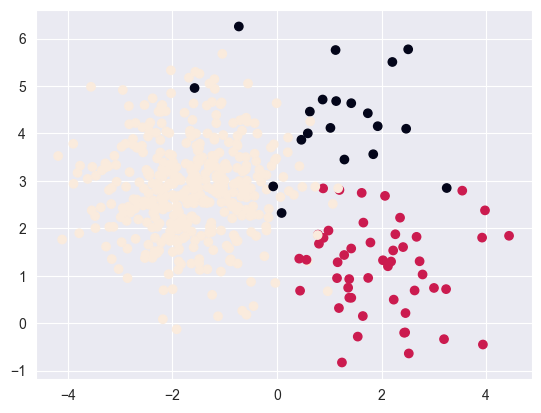

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Generate classification dataset.
X, y = make_blobs(n_samples=[20, 50, 400], random_state=0)

# Visualize the dataset.
plt.scatter(X[:,0], X[:,1], c=y)

# Split the dataset into 80% training data and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training data.
lr = LogisticRegression(max_iter=2000, random_state=0)
lr.fit(X_train, y_train)

# Evaluate and print the three performance measures on the training and test set.
y_pred = lr.predict(X_test)

print('accuracy: {}'.format(accuracy(y_test, y_pred)))
print('cohen_kappa: {}'.format(cohen_kappa(y_test, y_pred)))
print('f1: {}'.format(macro_f1_measure(y_test, y_pred)))

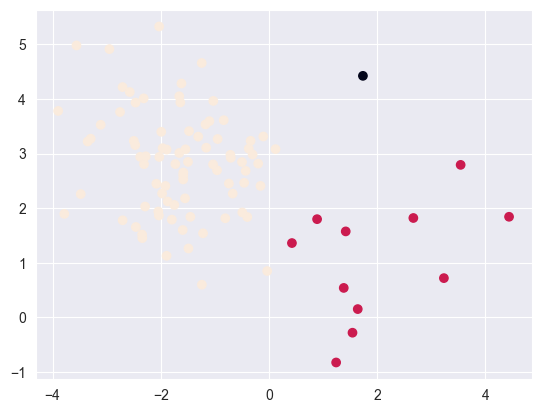

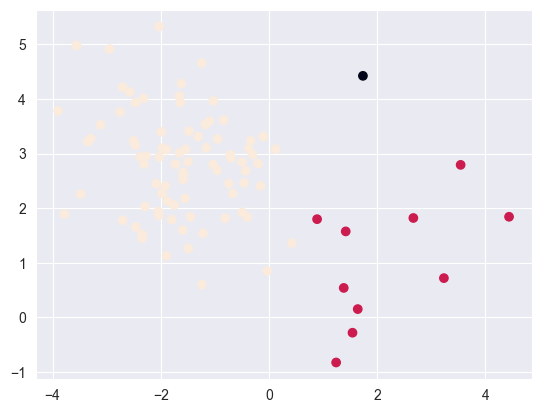

In [14]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()